In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from sklearn.metrics import silhouette_score
from utils import *
from data_pipeline import load_data, split_replicates
import matplotlib.pyplot as plt
import seaborn as sns
from clustering import *

In [2]:
expr, gene_symbols, sample_names = load_data()

Found 4297 genes in datafile
Found 518 genes in crp subset
Selecting 488 genes ...


# Hierarchical clustering on full expression matrix

In [3]:
# Perform hierarchical clustering on full expression matrix
l_matrix = hierarchical_clustering(expr)
y = 1 - correlations_list(expr, expr)
c, d = cophenet(l_matrix, y)
print('Cophenetic coefficient full dendrogram wrt. the original distance matrix: {}'.format(c))

Cophenetic coefficient full dendrogram wrt. the original distance matrix: 0.5819601051718906


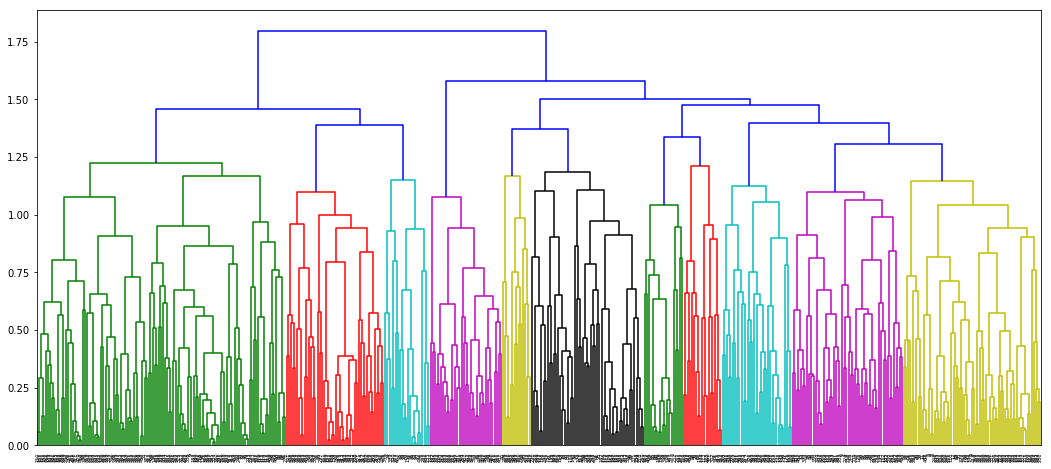

In [4]:
plt.figure(figsize=(18, 8))
dendrogram(l_matrix, truncate_mode='level');

# Hierarchical clustering on full expression matrix

In [5]:
idxs1, idxs2 = split_replicates(sample_names)
print('Set lengths: {} and {}'.format(len(idxs1), len(idxs2)))
l_matrix1 = hierarchical_clustering(expr[idxs1, :])
l_matrix2 = hierarchical_clustering(expr[idxs2, :])
c = compare_cophenetic(l_matrix1, l_matrix2)
print('Cophenetic coefficient dendrogram 1 wrt. dendrogram 2: {}'.format(c))
c, d = cophenet(l_matrix1, y)
print('Cophenetic coefficient dendrogram 1 wrt. the original distance matrix: {}'.format(c))
c, d = cophenet(l_matrix2, y)
print('Cophenetic coefficient dendrogram 2 wrt. the original distance matrix: {}'.format(c))

Set lengths: 441 and 466
Cophenetic coefficient dendrogram 1 wrt. dendrogram 2: 0.5153095656187748
Cophenetic coefficient dendrogram 1 wrt. the original distance matrix: 0.5314924122142335
Cophenetic coefficient dendrogram 2 wrt. the original distance matrix: 0.5804442548545252


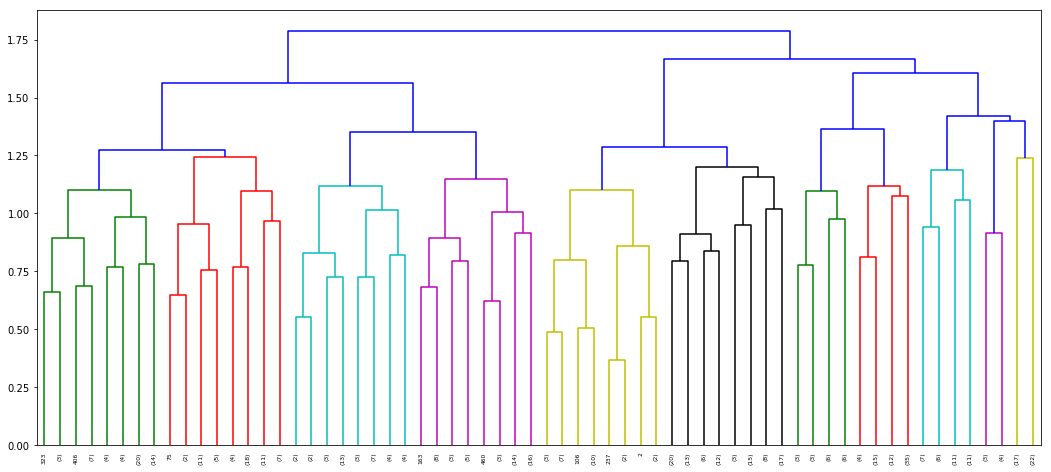

In [6]:
plt.figure(figsize=(18, 8))
dendrogram(l_matrix1, truncate_mode='level', p=5);

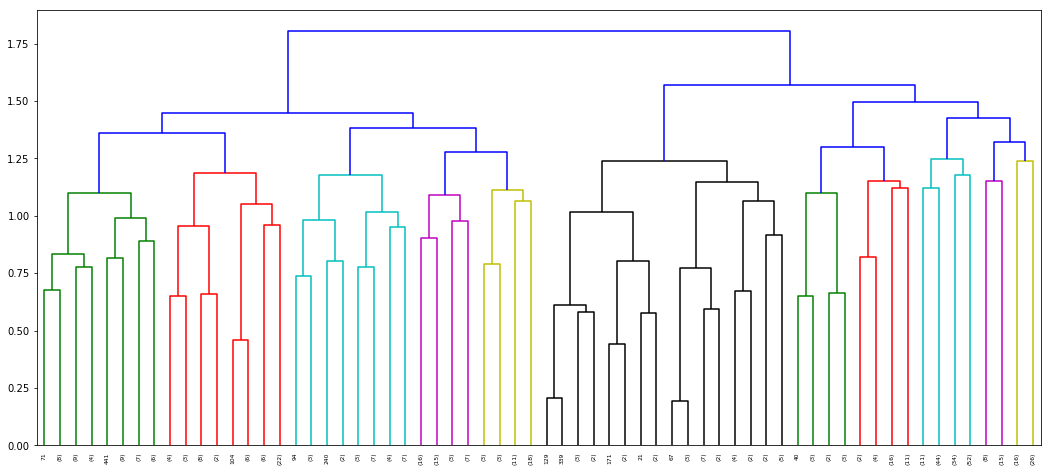

In [7]:
plt.figure(figsize=(18, 8))
dendrogram(l_matrix2, truncate_mode='level', p=5);

# Silhouette histogram for full dendrogram

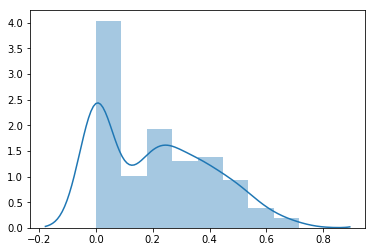

In [8]:
silhouettes = compute_silhouette(expr, l_matrix)
sns.distplot(silhouettes);

# Silhouette histogram for full dendrogram

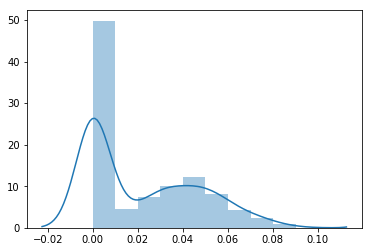

In [9]:
random_noise = np.random.uniform(4, 14, expr.shape)
l_matrix_rand = hierarchical_clustering(random_noise)
silhouettes_rand = compute_silhouette(random_noise, l_matrix_rand)
sns.distplot(silhouettes_rand);

# Example motivating the dendrogram distance metric

In [10]:
q = 10
dx = np.array([[1, 2, q], [2, 1, 3], [q, 3, 1.0]])
dz = np.array([[1, 3, q], [3, 1, 2], [q, 2, 1.0]])
dx_ = upper_diag_list(dx)
dz_ = upper_diag_list(dz)
print('Distance matrices Pearson correlation: {}'.format(pearson_correlation(dx_, dz_)))
lx = linkage(dx_, 'complete')
lz = linkage(dz_, 'complete')
print('Dendrogram distance: {}'.format(compare_cophenetic(lx, lz)))

Distance matrices Pearson correlation: 0.9736842105263159
Dendrogram distance: -0.5


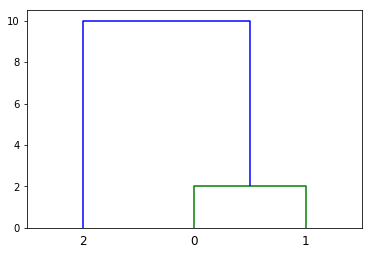

In [11]:
dendrogram(lx);

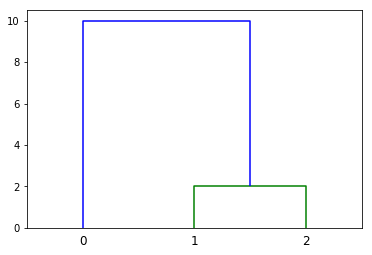

In [12]:
dendrogram(lz);

In [13]:
dendrogram_distance(lx, condensed=False)

array([[ 0.,  2., 10.],
       [ 2.,  0., 10.],
       [10., 10.,  0.]])

In [14]:
dendrogram_distance(lz, condensed=False)

array([[ 0., 10., 10.],
       [10.,  0.,  2.],
       [10.,  2.,  0.]])

In [15]:
q = 10
dx = np.array([[1, 2, q], [2, 1, 3], [q, 3, 1.0]])
# dz = np.array([[1, 4, q], [4, 1, 3], [q, 3, 1.0]])
dz = 2*dx
dx_ = upper_diag_list(dx)
dz_ = upper_diag_list(dz)
print('Distance matrices Pearson correlation: {}'.format(pearson_correlation(dx_, dz_)))
lx = linkage(dx_, 'complete')
lz = linkage(dz_, 'complete')
print('Dendrogram distance: {}'.format(compare_cophenic(lx, lz)))

Distance matrices Pearson correlation: 1.0


NameError: name 'compare_cophenic' is not defined

In [ ]:
dendrogram(lx);

In [ ]:
dendrogram(lz);